| Adelie penguins                                       | Chinstrap penguins                                      | Gentoo penguins                                 |
| ------------------------------------------------------| --------------------------------------------------------| ----------------------------------------------- |
| <img src="Adelie.jpg" width="40%" height="40%"> | <img src="Chinstrap.jpg" width="40%" height="40%">| <img src="Gentoo.jpg" width="40%" height="40%">


# Penguin Analysis: Part I
#### Extensive EDA

*Purpose*\
To provide an extensive statistical analysis on three sets of penguin data in order to better understand penguin future expectations (such as body mass) for sustainability requirements, specifically feeding, and prepare data for regression and clustering models. 

*Deliverables for Part I* 
A extensive EDA: cleaning of the data set, statistical analyses, and visualizations of the penguin data set. The statistical analyses include examinations into the penguins by both species and sex. Insights.

*Data*\
This project uses the Palmer Penguins data set collected and made available by Dr. Kristen Gorman and PalmerStation, Antarctica, LTER. The data is available at: https://allisonhorst.github.io/palmerpenguins. Here it was accessed through the seaborn library. 

*Code*\
All code for this project is located at: https://github.com/izsolnay/Penguins_Python

*Report*\
The report for this project is located at: https://github.com/izsolnay/Penguins_Python

In [1]:
# Import basic packages
import pandas as pd

# Import packages for visualizations
import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt

# Import regression package
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Import hypothesis testing packages
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Import data
df0 = sns.load_dataset('penguins', cache=False) # cache=False: function will not store any cached data or results for future use
df0.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Part Ia: Basic EDA

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
print('species')
print(df0['species'].unique())
print('island')
print(df0['island'].unique())
print('sex')
print(df0['sex'].unique())

species
['Adelie' 'Chinstrap' 'Gentoo']
island
['Torgersen' 'Biscoe' 'Dream']
sex
['Male' 'Female' nan]


In [5]:
# Check for missing values
df0.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

#### Results    
The df has 344 observations and 7 variables:
* 3 *object*: `species`, `island`, and `sex`
  * `species`: Adelie, Chinstrap, Gentoo
  * `island`: Biscoe, Dream, Torgersen
  * `sex`: Female, Male   
    
* 4 *continuous float*: `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`
  
* `sex` is missing 11 values
  
* `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g` are all missing 2 values each

#### Review rows with null values 

In [6]:
# Create a new df of just the rows that are missing data
df_null = df0[df0.isnull().any(axis=1)] # axis=1 specifies columns/variables with null values
df_null

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [7]:
# Keep rows missing sex label for aggregation
# Drop rows 3 & 339, because missing all values
df = df0.copy()
df.drop([3, 339], inplace=True, axis=0) # inplace=True modefy without creating a new df

df.reset_index(drop=True) # reset_index() resets index values for the rows in df
                                        # drop=True does not insert new index col into df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [8]:
# Check for duplicates
duplicates = df[df.duplicated(keep=False)]
duplicates

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [9]:
# Drop duplicates
df.drop_duplicates()
df.drop_duplicates().shape

(342, 7)

### Get basic statistics
* Create general visual plots

In [10]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


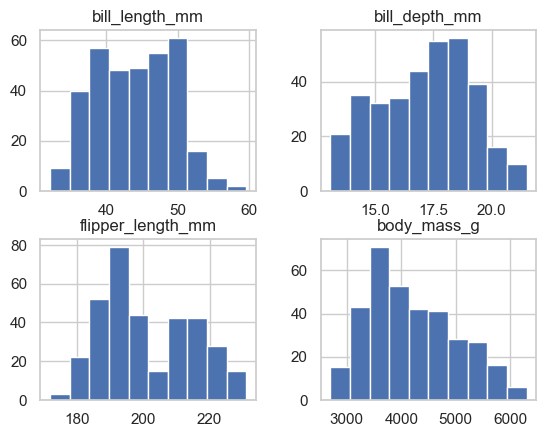

In [11]:
# Visualize distributions
df.hist();

In [12]:
# Get value counts for categorical 'species'
counts = df['species'].value_counts()
percentages = df['species'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'  # Format as %

result = pd.DataFrame({'counts': counts, 'percentage': percentages}).reset_index()
result.style.background_gradient()

,species,counts,percentage
0,Adelie,151,44.2%
1,Gentoo,123,36.0%
2,Chinstrap,68,19.9%


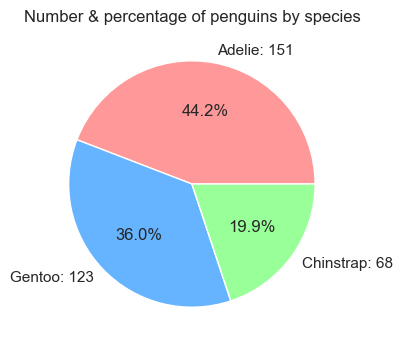

In [13]:
# Create pie chart for species category
fig = plt.figure(figsize=(4, 4))
data = df['species'].value_counts()

plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',  # First category
                f'{data.index[1]}: {data.values[1]}',  # Add second category
                f'{data.index[2]}: {data.values[2]}'],  # Add third category
        autopct='%1.1f%%',                              # Format as %
        colors=['#ff9999', '#66b3ff', '#99ff99']  # Add color for categories
        )

plt.title('Number & percentage of penguins by species');

In [14]:
# Get value counts for categorical 'island'
counts = df['island'].value_counts()
percentages = df['island'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

result = pd.DataFrame({'counts': counts, 'percentage': percentages}).reset_index()
result.style.background_gradient()

,island,counts,percentage
0,Biscoe,167,48.8%
1,Dream,124,36.3%
2,Torgersen,51,14.9%


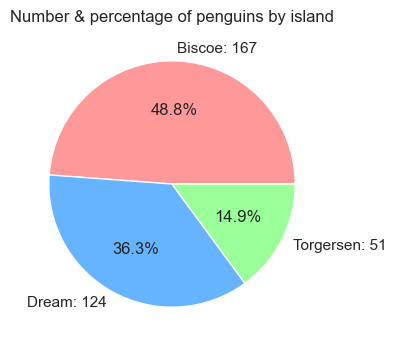

In [15]:
# Create pie chart for island category
fig = plt.figure(figsize=(4, 4))
data = df['island'].value_counts()

plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}',
                f'{data.index[2]}: {data.values[2]}'],
        autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff', '#99ff99']
        )

plt.title('Number & percentage of penguins by island');

In [16]:
# Get value counts for categorical 'sex'
counts = df['sex'].value_counts()
percentages = df['sex'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

result = pd.DataFrame({'counts': counts, 'percentage': percentages}).reset_index()
result.style.background_gradient(axis=None)

,sex,counts,percentage
0,Male,168,50.5%
1,Female,165,49.5%


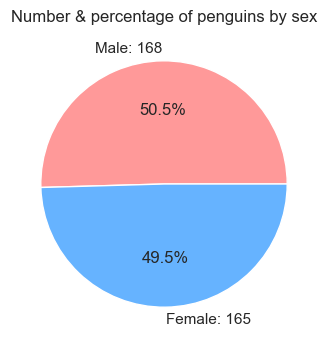

In [17]:
# Pie chart for sex accepting that 9 rows are missing a sex label
fig = plt.figure(figsize=(4,4))
data=df['sex'].value_counts()

plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%', colors=['#ff9999', '#66b3ff']
        )
plt.title('Number & percentage of penguins by sex');

#### Summary of statistics
`bill_length_mm` has a mostly normal distribution
* 32.10 mm > 59.60 mm
* median: 44.45 mm

`bill_depth_mm` has a mostly normal distribution, though it skews right
* 13.10 mm > 21.50 mm
* median: 17.30 mm
  
`flipper_length_mm` has a curious distribution
* 172.00 mm > 231.00 mm
* median: 197.00 mm
  
`body_mass_g` has a left skewed distribution
* 2700 g > 6300 g
* median: 4050 g


Objects breakdown:    
* 3 `species`:
  * 151 Adelie (44.2%)
  * 123 Gentoo (36.0%)
  * 68 Chinstrap (19.9%)

* 3 `island`:
  * 167 from Biscoe (48.8%)
  * 124 from Dream (36.3%)
  * 51 from Torgersen (14.9%)

* 2 `sex`: 
  * 165 females (49.5%)
  * 168 males (50.5%)
  * with 9 rows missing a sex label

In [18]:
# Compare clusters to original cleaned df for K-means comparison
counts = df.groupby('island')['species'].value_counts()
percentages = df.groupby('island')['species'].value_counts(normalize=True)

result = pd.DataFrame({'counts': counts, 'percentage': percentages}).reset_index()
result.style.background_gradient(axis=0)

,island,species,counts,percentage
0,Biscoe,Gentoo,123,0.736527
1,Biscoe,Adelie,44,0.263473
2,Dream,Chinstrap,68,0.548387
3,Dream,Adelie,56,0.451613
4,Torgersen,Adelie,51,1.000000


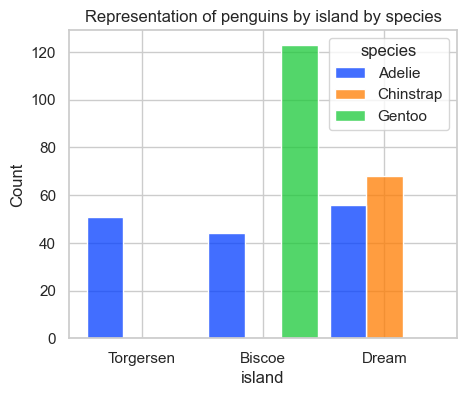

In [19]:
# Create histogram of species count per island
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='island',
             hue='species',
             palette='bright',
             multiple='dodge',
             shrink=0.9)
plt.title('Representation of penguins by island by species');

In [20]:
# Compare clusters to original cleaned df for K-means comparison
counts = df.groupby('species')['island'].value_counts()
percentages = df.groupby('species')['island'].value_counts(normalize=True)

result = pd.DataFrame({'counts': counts, 'percentage': percentages}).reset_index()
result.style.background_gradient()

,species,island,counts,percentage
0,Adelie,Dream,56,0.370861
1,Adelie,Torgersen,51,0.337748
2,Adelie,Biscoe,44,0.291391
3,Chinstrap,Dream,68,1.000000
4,Gentoo,Biscoe,123,1.000000


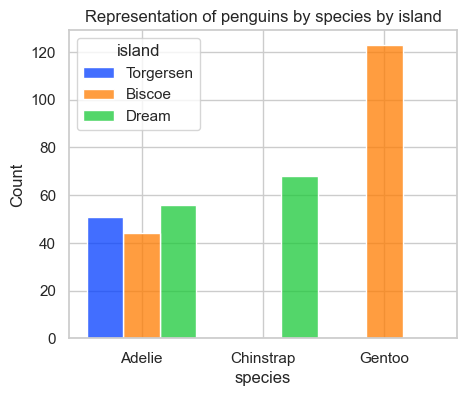

In [21]:
# Create histogram of species count per island
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='species',
             hue='island',
             palette='bright',
             multiple='dodge',
             shrink=0.9)
plt.title('Representation of penguins by species by island');

### Investigate variables
#### Create relational scatter and box plots
In order to:  
* compare features measurements between penguin species
* check for outliers

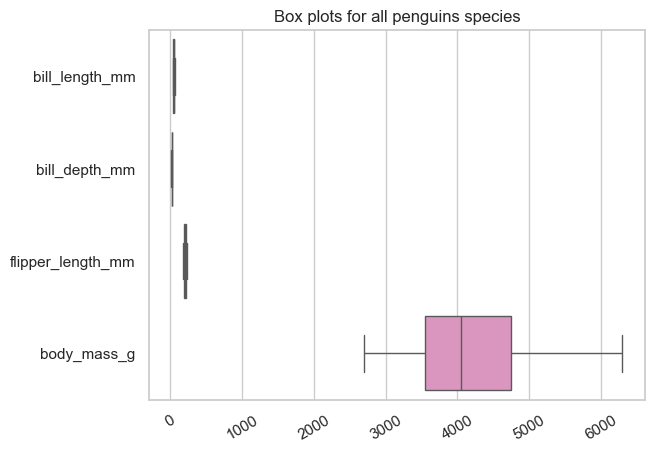

In [22]:
# Visually check for outliers
sns.boxplot(data = df, orient='h', palette='Set2', showfliers=True)  # orient='h' to orient horizontally
plt.xticks(rotation=30)                                              # Set x-axis tick labels to 30 degrees
plt.title('Box plots for all penguins species')
plt.show();

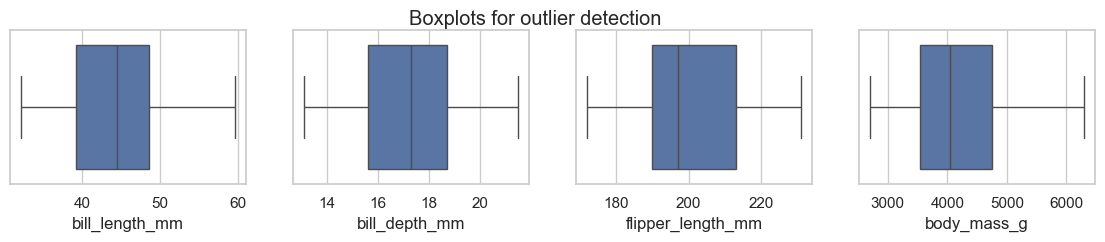

In [23]:
# Create enlarged boxplots to check for outliers
fig, axes = plt.subplots(1, 4, figsize=(14, 2))   # Set spacing and dimensions for subplots
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['bill_length_mm'])
sns.boxplot(ax=axes[1], x=df['bill_depth_mm'])
sns.boxplot(ax=axes[2], x=df['flipper_length_mm'])
sns.boxplot(ax=axes[3], x=df['body_mass_g'])
plt.show();

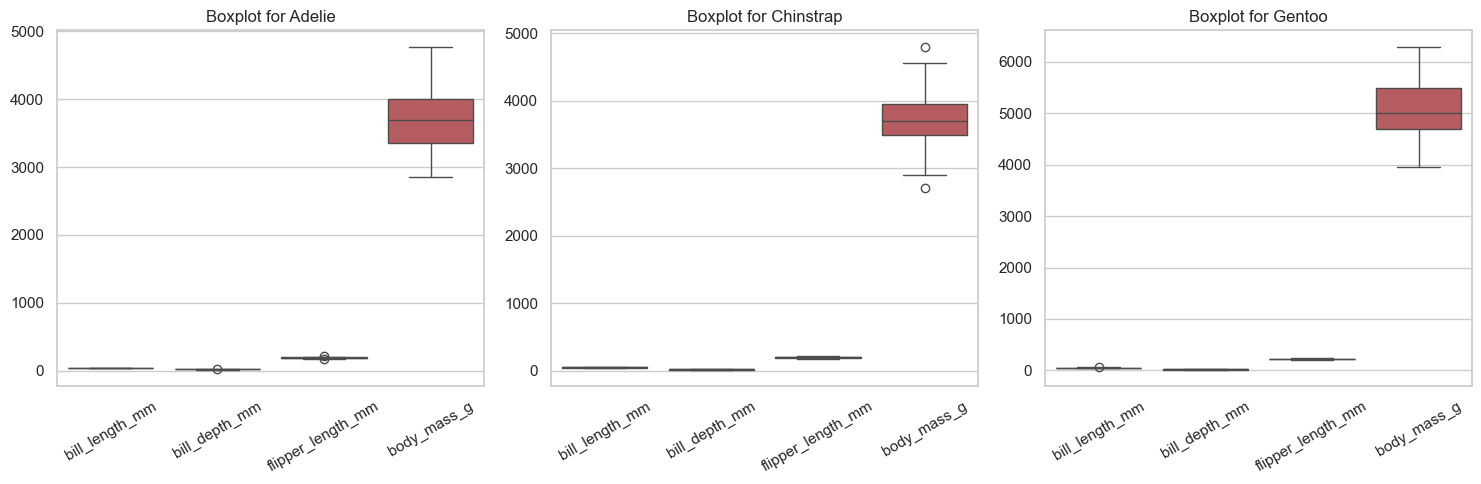

In [24]:
# Fix UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator
from matplotlib.ticker import FixedLocator

categorical_values = df['species'].unique()    #Set categories df

# Create side-by-side subplots for each categorical value
fig, axs = plt.subplots(1, len(categorical_values), figsize=(15, 5))

for i, value in enumerate(categorical_values):       # Create iterative for loop for categories df
    filtered_df = df[df['species'] == value]         # Filter by species, create filtered df
    sns.boxplot(data=filtered_df, ax=axs[i])
    axs[i].set_title(f'Boxplot for {value}')
    
# Set x-axis ticks to 30 degrees
    x_ticks = range(len(filtered_df))
    axs[i].xaxis.set_major_locator(FixedLocator(x_ticks))
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=30)

plt.tight_layout()  # tight_layout() function to add space between plots for a cleaner appearance.
plt.show()

Results
* The general df boxplots show the widest range of values for body mass and flipper length, each with a right skew
* The individual box plots demonstrate more outliers per species
  * Adelies seem to have outliers for bill depth and flipper length
  * Chinstraps seem to have outliers for body mass
  * Gentoos only seem to have outliers for bill length

#### Check null `sex` rows to continue investigating outliers
* can more observations be included by assigning a sex to the unlabelled penguins?

In [25]:
# Create a new df of just the rows that are missing data
df_null = df[df.isnull().any(axis=1)]
df_null

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [26]:
df_null_A = df[(df['species'] == 'Adelie') & df.isnull().any(axis=1)]
df_null_A.sort_values('body_mass_g', ascending=False)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN


In [27]:
df_null_G = df[(df['species'] == 'Gentoo') & df.isnull().any(axis=1)]
df_null_G.sort_values('body_mass_g', ascending=False)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN


In [28]:
# Get body_mass_g mins for species by sex
F_max = df[df['sex'] == 'Female'].groupby('species')['body_mass_g'].max()
M_min = df[df['sex'] == 'Male'].groupby('species')['body_mass_g'].min()

combined_min = pd.concat([F_max, M_min], axis=1)
combined_min.columns = ['F_max_mass', 'M_min_mass']
combined_min.reset_index()

,species,F_max_mass,M_min_mass
0,Adelie,3900.0,3325.0
1,Chinstrap,4150.0,3250.0
2,Gentoo,5200.0,4750.0


#### Results
df includes 9 observations with no sex label \
perhaps these weights allign with particular sexes and can be labelled
* 5 are Adelie: 8, 9, 10, 11, 47
  * body mass btwn 2975-4250g
    * max body mass for female Adelies is 3900g so observations **9** (4250g) can be labelled **MALE**
    * min body mass for male Adelies is 3325, so observations  **10** & **47** can be labelled **FEMALE**
    * *remove 8 & 11*
* 4 are Gentoo: 246, 286, 324, 336
  * body mass btwn 4100-4875g
    * max body mass for female Gentoos is 5200 so no observations can be labelled either female or male
    * min body mass for male Gentoos is 4750, so observations  **246**, **286**, & **324** can be labelled **FEMALE**
    * *remove 336*
* Provide 6 out of 9 unlabelled `sex` labels 

In [29]:
# Change observation 9 from sex NaN to Male
df_clean = df.copy()
df_clean.loc[9, 'sex'] = 'Male'

In [30]:
# Change observations 10, 47, 246, 286, & 324 from sex NaN to Female
df_clean.loc[[10, 47, 246, 286, 324], 'sex'] = 'Female'

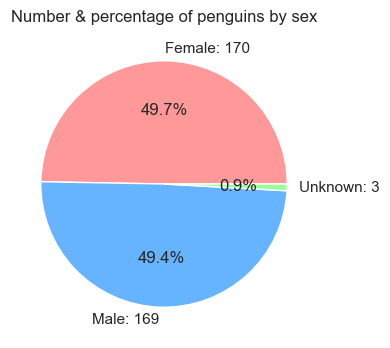

In [31]:
# Pie chart for labelled sex df 
df_clean['sex'].fillna('Unknown', inplace=True)  # Include NaNs

fig = plt.figure(figsize=(4,4))
data=df_clean['sex'].value_counts()

plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}',
                f'{data.index[2]}: {data.values[2]}'],
        autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff', '#99ff99']
        )

plt.title('Number & percentage of penguins by sex');

In [32]:
# Check if it worked
print(df_clean.loc[9])
df_clean[df_clean.isnull().any(axis=1)]

species                 Adelie
island               Torgersen
bill_length_mm            42.0
bill_depth_mm             20.2
flipper_length_mm        190.0
body_mass_g             4250.0
sex                       Male
Name: 9, dtype: object


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [33]:
# Drop rows 8, 11, 336, because missing 'sex' values
df_clean.drop([8, 11, 336], inplace=True, axis=0) # inplace=True modify without creating a new df

df_clean.reset_index(drop=True) # reset_index() resets index values for the rows in df
                                        # drop=True does not insert new index col into df
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            339 non-null    object 
 1   island             339 non-null    object 
 2   bill_length_mm     339 non-null    float64
 3   bill_depth_mm      339 non-null    float64
 4   flipper_length_mm  339 non-null    float64
 5   body_mass_g        339 non-null    float64
 6   sex                339 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.2+ KB


## Part Ib: More Extensive EDA
### Keep checking for outliers

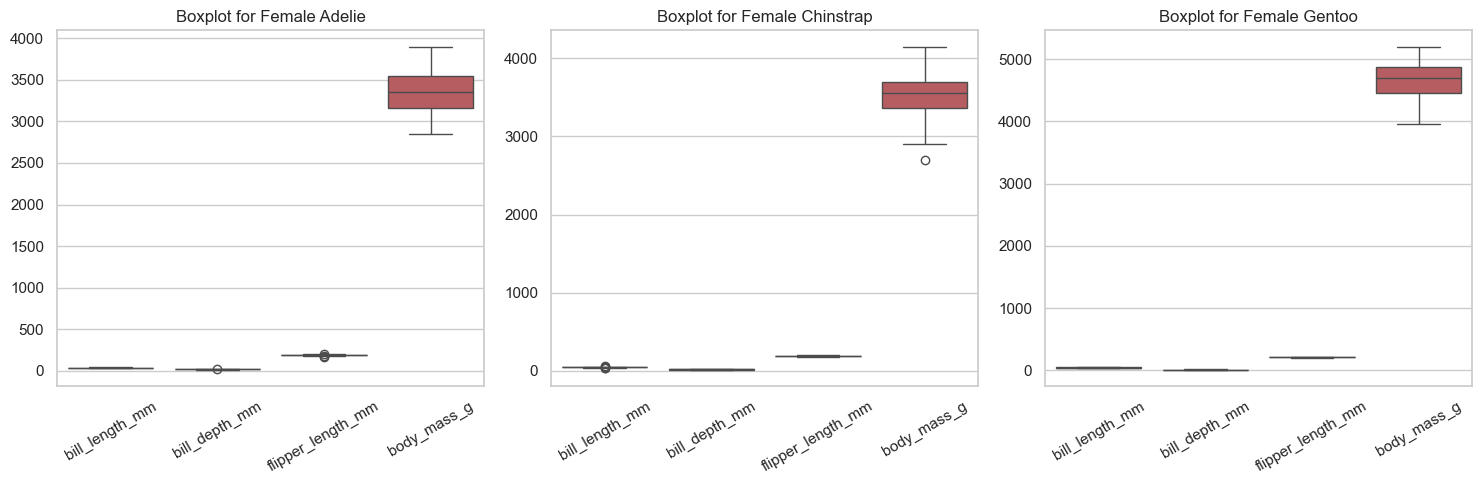

In [34]:
# Plot box plots by species and by sex
fig, axs = plt.subplots(1, len(categorical_values), figsize=(15, 5))

for i, value in enumerate(categorical_values):
    filtered_df = df_clean[(df_clean['species'] == value) & (df_clean['sex'] == 'Female')]  # Add 2nd filter conditions
    sns.boxplot(data=filtered_df, ax=axs[i])
    axs[i].set_title(f'Boxplot for Female {value}')

# Set x-axis ticks to 30 degrees
    x_ticks = range(len(filtered_df))
    axs[i].xaxis.set_major_locator(FixedLocator(x_ticks))
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show();

Results
* The individual Female specific box plots demonstrate more specific outliers
  * Adelies seem to have outliers for bill depth & flipper length
  * Chinstraps seem to have outliers for bill length & body mass
  * Gentoos seem to have no outliers

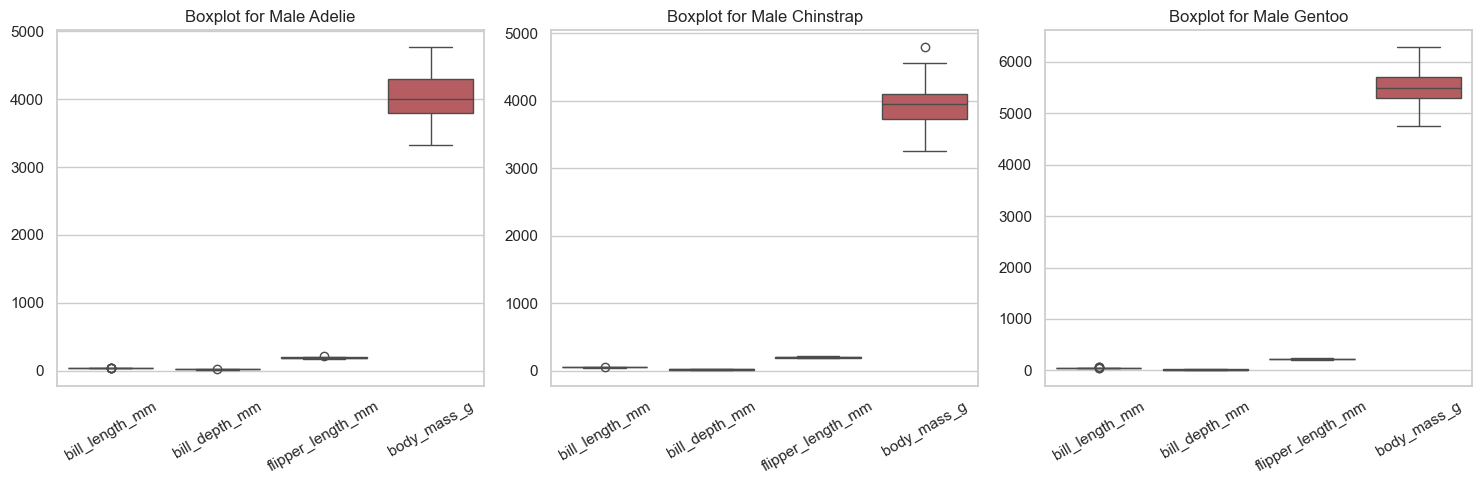

In [35]:
# Plot box plots by species and by sex
fig, axs = plt.subplots(1, len(categorical_values), figsize=(15, 5))

for i, value in enumerate(categorical_values):
    filtered_df = df_clean[(df_clean['species'] == value) & (df_clean['sex'] == 'Male')]
    sns.boxplot(data=filtered_df, ax=axs[i])
    axs[i].set_title(f'Boxplot for Male {value}')

# Set x-axis ticks to 30 degrees
    x_ticks = range(len(filtered_df))
    axs[i].xaxis.set_major_locator(FixedLocator(x_ticks))
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show();

Results
* The individual Male specific box plots demonstrate more specific outliers
  * Adelies seem to have outliers for bill length, bill depth, & flipper length
  * Chinstraps seem to have outliers for bill length & body mass
  * Gentoos seem to have outliers for bill length

### Further investigate for outliers
Spcifically:   

`bill_length_mm`
* Gentoos and M Gentoos
* F Chinstraps and M Chinstraps
* M Adelies

`bill_depth_mm`
* Adelies and M Adelies

`flipper_length_mm`
* Adelies, F Adelies, and M Adelies

`body_mass_g`
* Chinstraps, F Chinstraps, and M Chinstraps

#### Investigate bill_length_mm

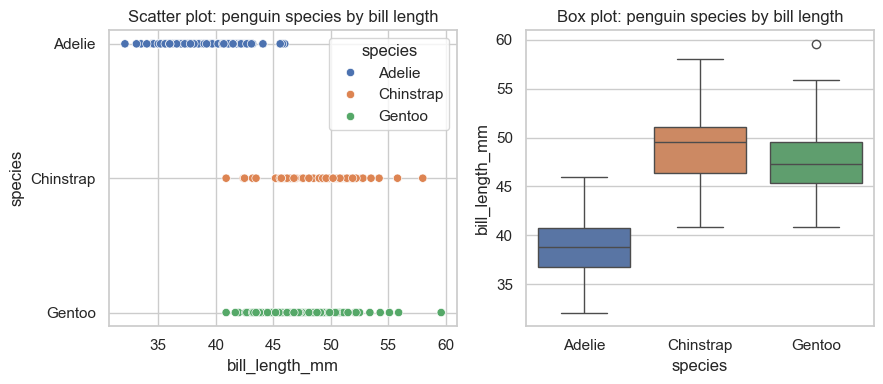

In [36]:
# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize = (9, 4))

# Relational scatter plot showing bill_length_mm by species
sns.scatterplot(data=df_clean, x='bill_length_mm', y='species', hue = 'species', ax = axes[0])
axes[0].set_title('Scatter plot: penguin species by bill length')

# Relational boxplot showing bill_length_mm by species
sns.boxplot(x = 'species', y = 'bill_length_mm', data = df_clean, hue = 'species', ax=axes[1])
axes[1].set_title('Box plot: penguin species by bill length')

plt.tight_layout()
plt.show();

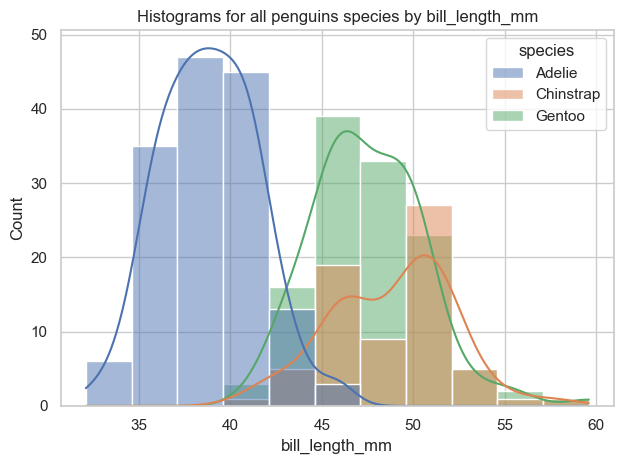

In [37]:
# Create relational histograms for bill_length_mm
sns.histplot(data=df_clean, x='bill_length_mm', hue='species', multiple='layer', kde=True)
plt.title('Histograms for all penguins species by bill_length_mm')

plt.tight_layout()
plt.show();

##### Apply the empirical rule

* ~76.15% of the data falls within 1 SD of the mean
* ~95.77% of the data falls within 2 SD of the mean
* ~99.62% of the data falls within 3 SD of the mean

Find outliers using the z-score which indicates the relative position of values
* z-score measures how many SD below or above the mean a data point is, & so can be used to detect outliers that are more than 3 SD below or above the mean
* a z-score is useful because it tells you where a value lies in a distribution
* observations with a z-score < -3 or > +3 are outliers; values that lie more than +/- 3 SDs from the mean

In [38]:
# Check to detect outliers that are more than 3 sandard diviations below or above the mean
from scipy import stats

In [39]:
# Compute the z-score for every bill_length_mm value within its species group
# Group by species then by bill_length_mm
df_zscore = df_clean.copy()
df_zscore['z_score_group_BL'] = df_zscore.groupby('species')['bill_length_mm'].transform(lambda x: stats.zscore(x))
                                # transform function to calculate the z-scores for bill_length_mm within each group
                                # lambda function calculates z-scores ((x - x.mean()) / x.std()), where 'x' = bill_length_mm within each group
df_zscore.sort_values(by='z_score_group_BL', ascending=False).head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,z_score_group_BL
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male,3.932105
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,Female,2.765385


In [40]:
# Filter the df to include only rows where z-scores are within +3 or -3 within their own group
df_filtered = df_zscore[(df_zscore['z_score_group_BL'] > 3) | (df_zscore['z_score_group_BL'] < -3)]
df_filtered

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,z_score_group_BL
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male,3.932105


In [41]:
# Compute the z-score for every bill_depth_mm value within its species and sex group
df_zscore['z_score_group_BL'] = df_zscore.groupby(['species', 'sex'])['bill_length_mm'].transform(lambda x: stats.zscore(x))
df_zscore.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,z_score_group_BL
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.582194
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.122145


In [42]:
df_filtered = df_zscore[((df_zscore['z_score_group_BL'] > 3) | (df_zscore['z_score_group_BL'] < -3)) & (df_zscore['sex'] == 'Female')]
df_filtered

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,z_score_group_BL
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,Female,3.730956


In [43]:
df_filtered = df_zscore[((df_zscore['z_score_group_BL'] > 3) | (df_zscore['z_score_group_BL'] < -3)) & (df_zscore['sex'] == 'Male')]
df_filtered

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,z_score_group_BL
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male,3.053035
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male,3.752954


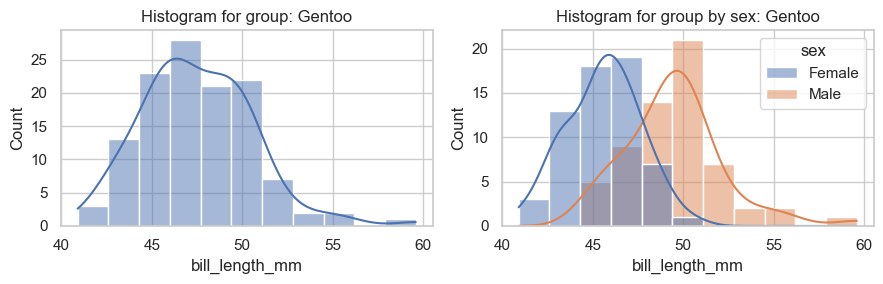

In [44]:
# Visually check Gentoo 253 by sex 
fig, axes = plt.subplots(1, 2, figsize = (9, 3))

# Create histogram which isolates Gentoos and bill_length_mm
group_to_plot = 'Gentoo'
filtered_df = df_clean[df_clean['species'] == group_to_plot]

# Plot histogram for bill_length_mm for Gentoos
sns.histplot(data=filtered_df, x='bill_length_mm', kde=True, ax = axes[0])
axes[0].set_title(f'Histogram for group: {group_to_plot}')

# Plot histogram for bill_length_mm for Gentoos by sex
sns.histplot(data=filtered_df, x='bill_length_mm', kde=True, hue='sex', ax = axes[1])
axes[1].set_title(f'Histogram for group by sex: {group_to_plot}')

plt.tight_layout()
plt.show();

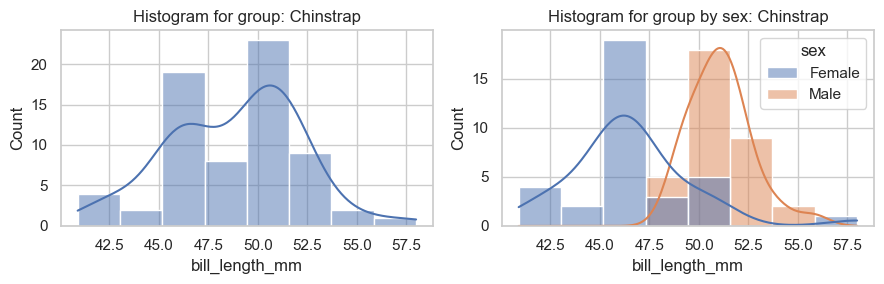

In [45]:
# Visually check Chinstraps 169 & 215 by sex
fig, axes = plt.subplots(1, 2, figsize = (9, 3))

# Create histogram which isolates Chinstraps and bill_length_mm
group_to_plot = 'Chinstrap'
filtered_df = df_clean[df_clean['species'] == group_to_plot]

# Plot histogram for bill_length_mm for Chinstraps
sns.histplot(data=filtered_df, x='bill_length_mm', kde=True, ax = axes[0])
axes[0].set_title(f'Histogram for group: {group_to_plot}')

# Plot histogram for bill_length_mm for Chinstraps by sex
sns.histplot(data=filtered_df, x='bill_length_mm', kde=True, hue='sex', ax = axes[1])
axes[1].set_title(f'Histogram for group by sex: {group_to_plot}')

plt.tight_layout()
plt.show();

In [46]:
# Filter the df to include Chinstrap observations and sort in ascending order based on bill_length_mm
BL = df_clean[df_clean['species'] == 'Chinstrap'].sort_values('bill_length_mm', ascending=False)
BL.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,Female
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
183,Chinstrap,Dream,54.2,20.8,201.0,4300.0,Male


#### Results    
* the features by species by bill length box plots show a wide range of lengths for Chinstraps and and seemingly 1 outlier for the Gentoos observation 253
* typical Gentoos have bill lengths of between 42.5 and 50mm in length
  * once sex is taken into account, the outliers become more evident amongst the males 
  * in the histograms, the the male Gentoo histogram demonstrates a right skew (or longer bill length) for a few male Gentoos
  * **Remove: observation 253**
* the histograms for the Chinstraps by bill length and sex show 1 female (longer than the males!) & 1 male penguin with beyond the 3 SD bill lengths
  * **Remove: observations 169 and 215** 

#### Investigate bill_depth_mm

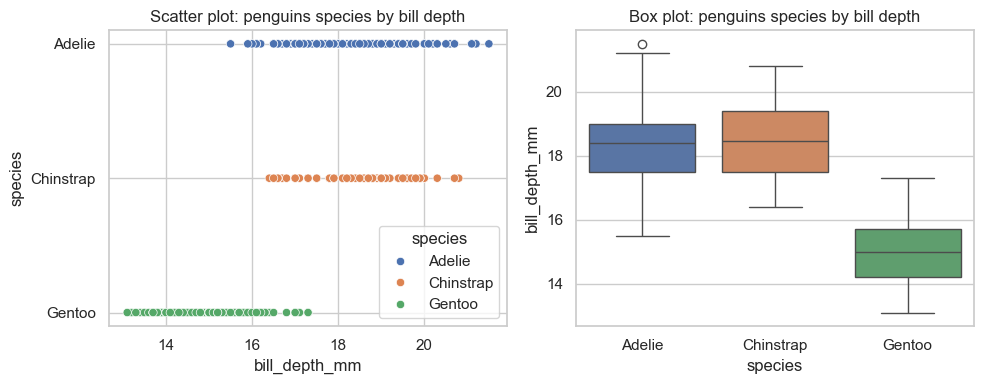

In [47]:
# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

# Relational scatter plot showing bill depth by species
sns.scatterplot(data=df_clean, x='bill_depth_mm', y='species', hue = 'species', ax = axes[0])
axes[0].set_title('Scatter plot: penguins species by bill depth')

# Relational boxplot showing bill depth by species
sns.boxplot(x = 'species', y = 'bill_depth_mm', data = df_clean, hue = 'species', ax=axes[1])
axes[1].set_title('Box plot: penguins species by bill depth')

plt.tight_layout()
plt.show();

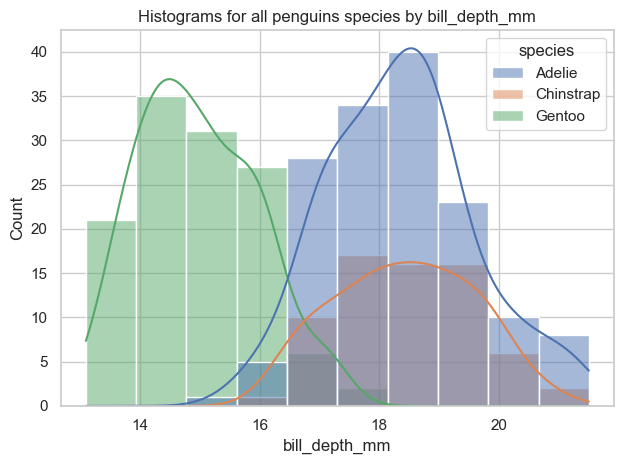

In [48]:
# Create relationsional histograms for bill_depth_mm
sns.histplot(data=df_clean, x='bill_depth_mm', hue='species', multiple='layer', kde=True)
plt.title('Histograms for all penguins species by bill_depth_mm')

plt.tight_layout()
plt.show();

In [49]:
# Compute the z-score for every bill_depth_mm value within its species group
df_zscore = df_clean.copy()
df_zscore['z_score_group_BD'] = df_zscore.groupby('species')['bill_depth_mm'].transform(lambda x: stats.zscore(x))
df_zscore.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,z_score_group_BD
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.283337
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.784413


In [50]:
# Filter the df to include only rows where z-scores are within +3 or -3 within their own group
df_filtered = df_zscore[(df_zscore['z_score_group_BD'] > 3) | (df_zscore['z_score_group_BD'] < -3)]
df_filtered

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,z_score_group_BD


In [51]:
# Compute the z-score for every bill_depth_mm value within its species and sex group
df_zscore['z_score_group_BD'] = df_zscore.groupby(['species', 'sex'])['bill_depth_mm'].transform(lambda x: stats.zscore(x))
df_zscore.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,z_score_group_BD
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.382703
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.247457


In [52]:
df_filtered = df_zscore[((df_zscore['z_score_group_BD'] > 3) | (df_zscore['z_score_group_BD'] < -3)) & (df_zscore['sex'] == 'Female')]
df_filtered

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,z_score_group_BD
114,Adelie,Biscoe,39.6,20.7,191.0,3900.0,Female,3.272403


In [53]:
df_filtered = df_zscore[((df_zscore['z_score_group_BD'] > 3) | (df_zscore['z_score_group_BD'] < -3)) & (df_zscore['sex'] == 'Male')]
df_filtered

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,z_score_group_BD


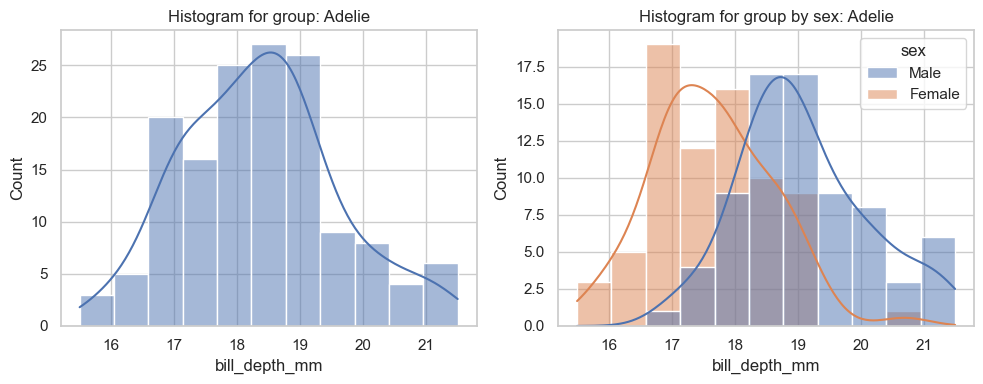

In [54]:
# Visually check Adelies by sex 
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

# Create histogram which isolates Adelie and bill_depth_mm
group_to_plot = 'Adelie'
filtered_df = df_clean[df_clean['species'] == group_to_plot]

# Plot histogram for bill_depth_mm for Adelie
sns.histplot(data=filtered_df, x='bill_depth_mm', kde=True, ax = axes[0])
axes[0].set_title(f'Histogram for group: {group_to_plot}')

# Plot histogram for bill_depth_mm for Adelie by sex
sns.histplot(data=filtered_df, x='bill_depth_mm', kde=True, hue='sex', ax = axes[1])
axes[1].set_title(f'Histogram for group by sex: {group_to_plot}')

plt.tight_layout()
plt.show();

In [55]:
# Filter the df to include Female Adelie observations and sort in ascending order based on bill_depth_mm
BD = df_clean[(df_clean['species'] == 'Adelie') & (df_clean['sex'] == 'Female')].sort_values('bill_depth_mm', ascending=False)
BD.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
114,Adelie,Biscoe,39.6,20.7,191.0,3900.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


#### Results
* although the box plot demonstrates outliers for the Adelie penguins, the histograms suggests Adelies have a wide range of bill depth with a fairly normal distribution
  * once sex is taken into account, there is 1 female Adelie penguin with a very deep bill beyond the 3 SD bill length
    * **Remove: observation #114**
  * Although there are multiple male Adelies with deeper bills, to remove them is unwarrented since according to the historgram these male Adelies have a very wide range of bill depths 

#### Investigate flipper_length_mm

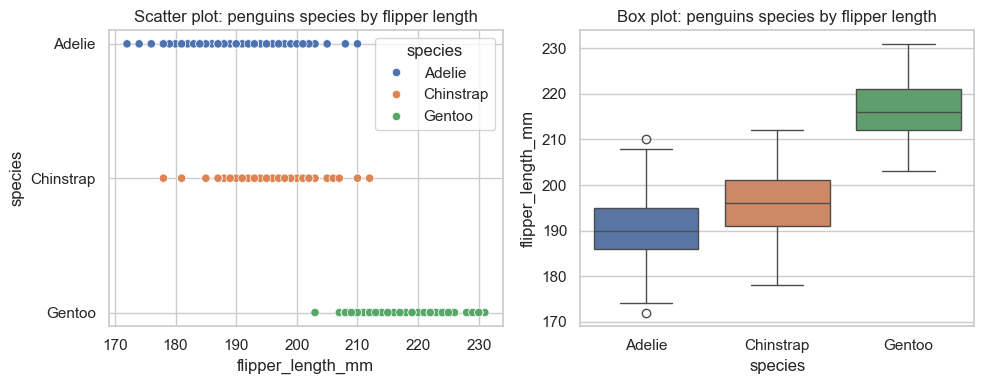

In [56]:
# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

# Relational scatter plot showing flipper_length_mm by species
sns.scatterplot(data=df_clean, x='flipper_length_mm', y='species', hue = 'species', ax = axes[0])
axes[0].set_title('Scatter plot: penguins species by flipper length')

# Relational boxplot showingflipper_length_mm by species
sns.boxplot(x = 'species', y = 'flipper_length_mm', data = df_clean, hue = 'species', ax=axes[1])
axes[1].set_title('Box plot: penguins species by flipper length')

plt.tight_layout()
plt.show();

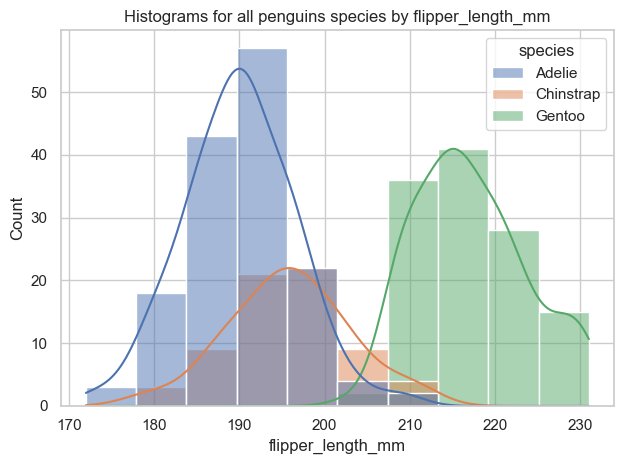

In [57]:
# Create relational histograms for flipper_length_mm
sns.histplot(data=df_clean, x='flipper_length_mm', hue='species', multiple='layer', kde=True)
plt.title('Histograms for all penguins species by flipper_length_mm')

plt.tight_layout()
plt.show();

In [58]:
# Compute the z-score for every flipper_length_mm value within its species group
df_zscore = df_clean.copy()
df_zscore['z_score_group_FL'] = df_zscore.groupby('species')['flipper_length_mm'].transform(lambda x: stats.zscore(x))
df_zscore.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,z_score_group_FL
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-1.383435
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.614860


In [59]:
# Filter df to include only rows where z-scores are within +3 or -3 within their own group
df_filtered = df_zscore[(df_zscore['z_score_group_FL'] > 3) | (df_zscore['z_score_group_FL'] < -3)]
df_filtered

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,z_score_group_FL
129,Adelie,Torgersen,44.1,18.0,210.0,4000.0,Male,3.074299


In [60]:
# Compute the z-score for every flipper_length_mm value within its species and sex group
df_zscore['z_score_group_FL'] = df_zscore.groupby(['species', 'sex'])['flipper_length_mm'].transform(lambda x: stats.zscore(x))
df_zscore.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,z_score_group_FL
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-1.746362
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.296439


In [61]:
df_filtered = df_zscore[((df_zscore['z_score_group_FL'] > 3) | (df_zscore['z_score_group_FL'] < -3)) & (df_zscore['sex'] == 'Male')]
df_filtered

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,z_score_group_FL


In [62]:
df_filtered = df_zscore[((df_zscore['z_score_group_FL'] > 3) | (df_zscore['z_score_group_FL'] < -3)) & (df_zscore['sex'] == 'Female')]
df_filtered

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,z_score_group_FL


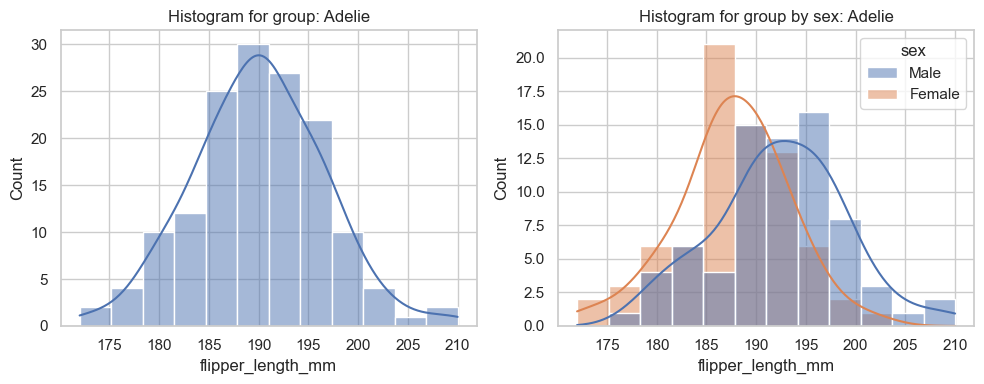

In [63]:
# Visually check 129 by sex 
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

# Create histogram which isolates Adelie and flipper_length_mm
group_to_plot = 'Adelie'
filtered_df = df_clean[df_clean['species'] == group_to_plot]

# Plot histogram for flipper_length_mm for Adelie
sns.histplot(data=filtered_df, x='flipper_length_mm', kde=True, ax = axes[0])
axes[0].set_title(f'Histogram for group: {group_to_plot}')

# Plot histogram for flipper_length_mm for Adelie by sex
sns.histplot(data=filtered_df, x='flipper_length_mm', kde=True, hue='sex', ax = axes[1])
axes[1].set_title(f'Histogram for group by sex: {group_to_plot}')

plt.tight_layout()
plt.show();

#### Results    
* although the box plot by flipper length demonstrates outliers for the Adelie penguins, the histograms suggest Adelies have a wide range of flipper lengths with a normal distribution
* a few Adelies have longer and shorter flipper lengths
* once sex is taken into account, the wide distribution of flipper lengths is explained with both sexes skewing a bit left (shorter flipper lengths)
* no Adelies will be removed, even though #129 has flippers beyond 3 SDs before analyized by sex
* no observations will be removed for outlying flipper length

#### Investigate body_mass_g

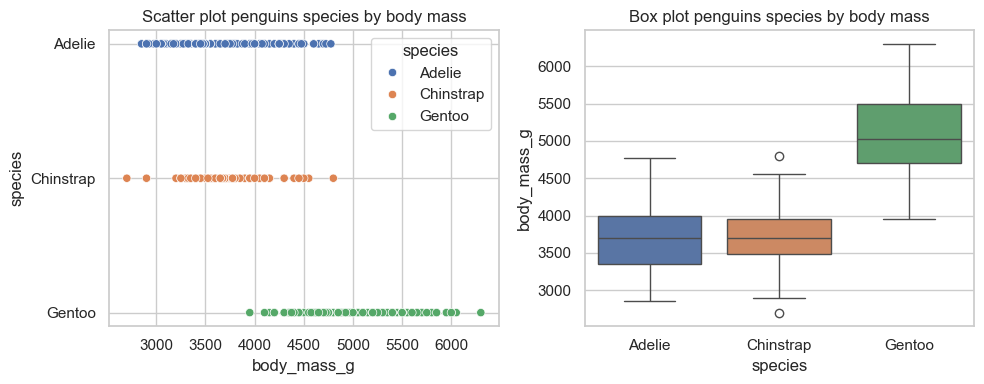

In [64]:
# Create side by side plot spaces
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

# Relational scatter plot showing body mass by species
sns.scatterplot(data=df_clean, x='body_mass_g', y='species', hue = 'species', ax = axes[0])
axes[0].set_title('Scatter plot penguins species by body mass')

# Relational boxplot showing body mass by species
sns.boxplot(x = 'species', y = 'body_mass_g', data = df_clean, hue = 'species', ax=axes[1])
plt.title('Penguins species by body mass')
axes[1].set_title('Box plot penguins species by body mass')

plt.tight_layout()
plt.show();

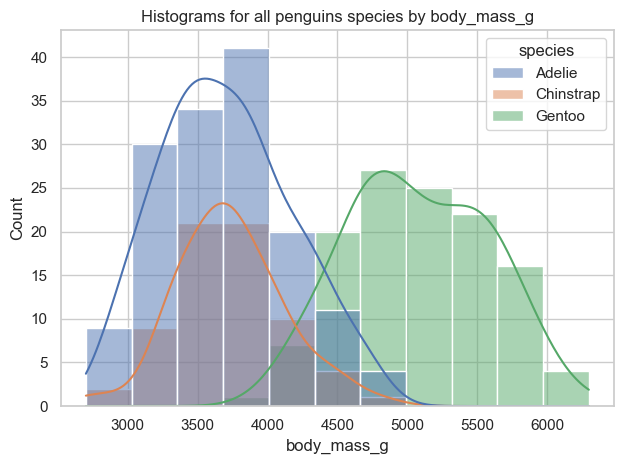

In [65]:
# Create relational histograms for body_mass_g
sns.histplot(data=df_clean, x='body_mass_g', hue='species', multiple='layer', kde=True)
plt.title('Histograms for all penguins species by body_mass_g')

plt.tight_layout()
plt.show();

In [66]:
# Compute the z-score for every body_mass_g value within its species group
df_zscore = df_clean.copy()
df_zscore['z_score_group_BM'] = df_zscore.groupby('species')['body_mass_g'].transform(lambda x: stats.zscore(x))
df_zscore.sort_values(by='body_mass_g', ascending=False).head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,z_score_group_BM
237,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,Male,2.426305
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male,1.930062


In [67]:
# Filter df to include only rows where z-scores are within +3 or -3 within their own group
df_filtered = df_zscore[(df_zscore['z_score_group_BM'] > 3) | (df_zscore['z_score_group_BM'] < -3)]
df_filtered

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,z_score_group_BM


In [68]:
# Compute the z-score for every body_mass_g value within its species and sex group
df_zscore['z_score_group_BM'] = df_zscore.groupby(['species', 'sex'])['body_mass_g'].transform(lambda x: stats.zscore(x))
df_zscore.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,z_score_group_BM
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.863996
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.632611


In [69]:
df_filtered = df_zscore[((df_zscore['z_score_group_BM'] > 3) | (df_zscore['z_score_group_BM'] < -3)) & (df_zscore['sex'] == 'Female')]
df_filtered

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,z_score_group_BM


In [70]:
df_filtered = df_zscore[((df_zscore['z_score_group_BM'] > 3) | (df_zscore['z_score_group_BM'] < -3)) & (df_zscore['sex'] == 'Male')]
df_filtered

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,z_score_group_BM


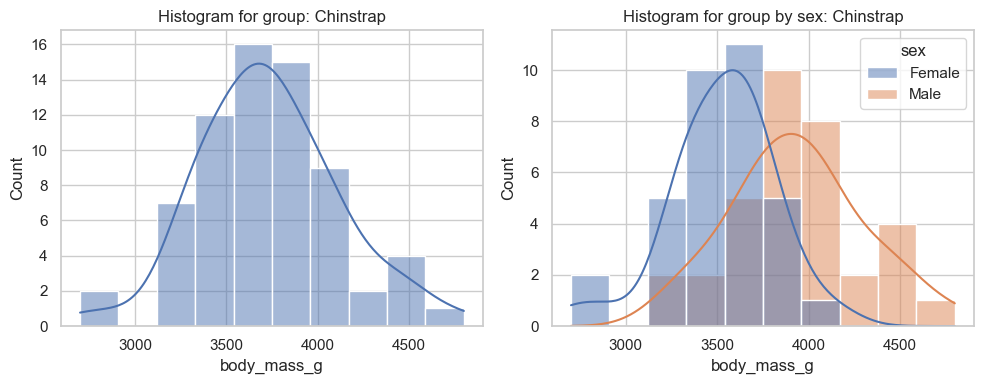

In [71]:
# Visually check by sex
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

# Create histogram which isolates Chinstrap and body_mass_g
group_to_plot = 'Chinstrap'
filtered_df = df_clean[df_clean['species'] == group_to_plot]

# Plot histogram for body_mass_g for Chinstrap
sns.histplot(data=filtered_df, x='body_mass_g', kde=True, ax = axes[0])
axes[0].set_title(f'Histogram for group: {group_to_plot}')

# Plot histogram for body_mass_g for Chinstrap by sex
sns.histplot(data=filtered_df, x='body_mass_g', kde=True, hue='sex', ax = axes[1])
axes[1].set_title(f'Histogram for group by sex: {group_to_plot}')

plt.tight_layout()
plt.show();

#### Results
* although the box plot by body mass demonstrates outliers for Chinstraps, extending both greater and lesser body masses, the histograms suggests Chinstraps have a wide range of body masse with a normal distribution
* no Chinstraps was +3 SD or -3 SD outside their own group
* once sex is taken in account, the histograms show fairly normal distributions for both sexes
* no observations will be removed for outlying body mass

#### Results of scatter plots
`body_mass_g` \
The Chinstrap group has some of the smallest of penguins by mass in the data set, and Gentoos the largest. The smallest Gentoos are of similar mass to the larger Adelie and Chinstraps.

`bill_length_mm` \
Adelies have the smallest bill lengths. Somewhat surprisingly, Chinstraps and Gentoo have comparable bill lengths. This is surprising because of their great differences in body mass. All the more so, since on on average Chinstraps have the longest bills.

`bill_depth_mm` \
Also surprisingly, even though they have the most mass, Gentoos have the smallest bill depth by far, with Adelies having slighlty more bill depth than Chinstraps.

`flipper_length_mm` \
Not surprisingly, Gentoo, the penguins with the largest body mass, have the longest flippers. Adelies have examples of penguins with some of the smallest flippers, but were essentially matched in flipper length with Chinstraps.


### Drop Outliers
* 114, 169, 215, 253

In [72]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            339 non-null    object 
 1   island             339 non-null    object 
 2   bill_length_mm     339 non-null    float64
 3   bill_depth_mm      339 non-null    float64
 4   flipper_length_mm  339 non-null    float64
 5   body_mass_g        339 non-null    float64
 6   sex                339 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.2+ KB


In [73]:
# Drop rows 114, 169, 215, 253
df_clean = df_clean.drop([114, 169, 215, 253], axis=0).reset_index(drop=True)                               
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            335 non-null    object 
 1   island             335 non-null    object 
 2   bill_length_mm     335 non-null    float64
 3   bill_depth_mm      335 non-null    float64
 4   flipper_length_mm  335 non-null    float64
 5   body_mass_g        335 non-null    float64
 6   sex                335 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.4+ KB


In [74]:
# Create new csv file for clean df
df_clean.to_csv('Penguins_clean.csv', index=False)
df = pd.read_csv('Penguins_clean.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### Additional graphics of features by sex by species for report
* body_mass_g
  * Adelie: female and male 
  * Chinstrap: female and male 
  * Gentoo: female and male 
* bill_length_mm
  * Adelie: female and male 
  * Chinstrap: female and male 
  * Gentoo: female and male 
* bill_depth_mm
  * Adelie: female and male 
  * Chinstrap: female and male 
  * Gentoo: female and male 
* flipper_length_mm
  * Adelie: female and male 
  * Chinstrap: female and male 
  * Gentoo: female and male 

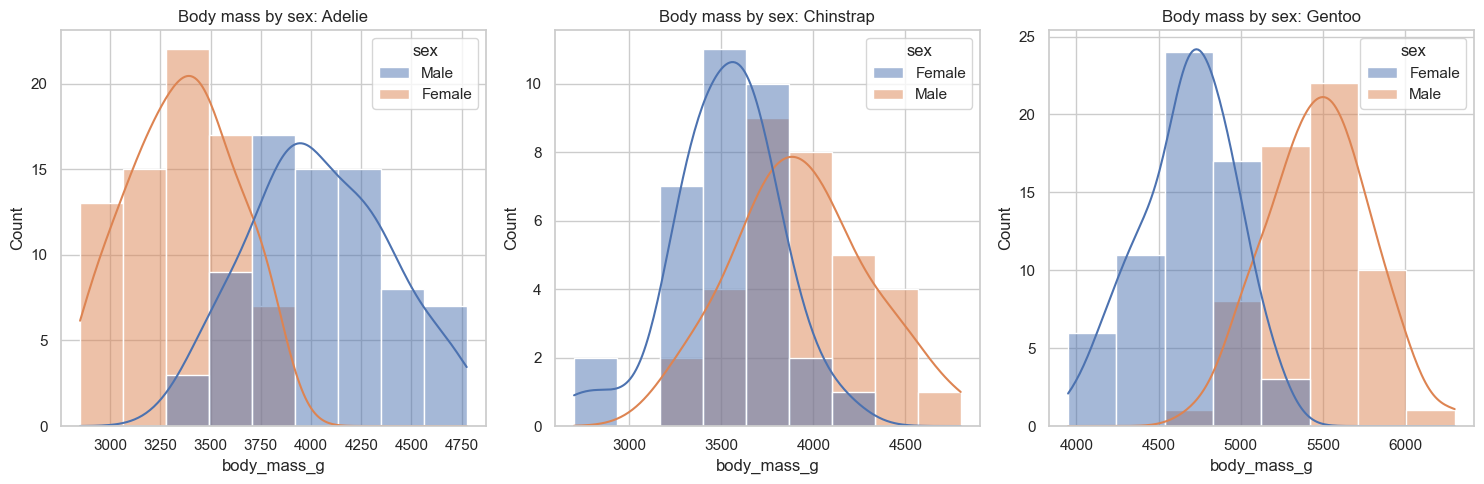

In [75]:
# Plot hostograms by species and by sex for body_mass_g
fig, axs = plt.subplots(1, len(categorical_values), figsize=(15, 5))

for i, value in enumerate(categorical_values):
    filtered_df = df_clean[(df_clean['species'] == value) & (df_clean['body_mass_g'])] 
    sns.histplot(data=filtered_df, x='body_mass_g', kde=True, hue='sex', ax=axs[i])
    axs[i].set_title(f'Body mass by sex: {value}')

plt.tight_layout()
plt.show()

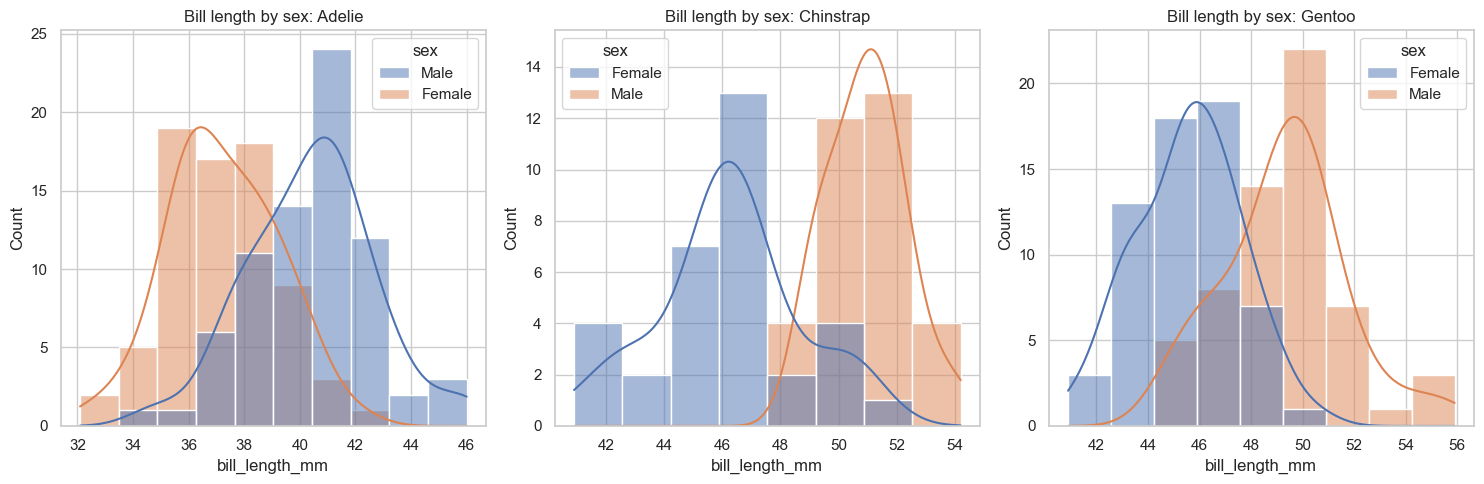

In [76]:
# Plot hostograms by species and by sex for bill_length_mm
fig, axs = plt.subplots(1, len(categorical_values), figsize=(15, 5))

for i, value in enumerate(categorical_values):
    filtered_df = df_clean[(df_clean['species'] == value) & (df_clean['bill_length_mm'])] 
    sns.histplot(data=filtered_df, x='bill_length_mm', kde=True, hue='sex', ax=axs[i])
    axs[i].set_title(f'Bill length by sex: {value}')

plt.tight_layout()
plt.show()

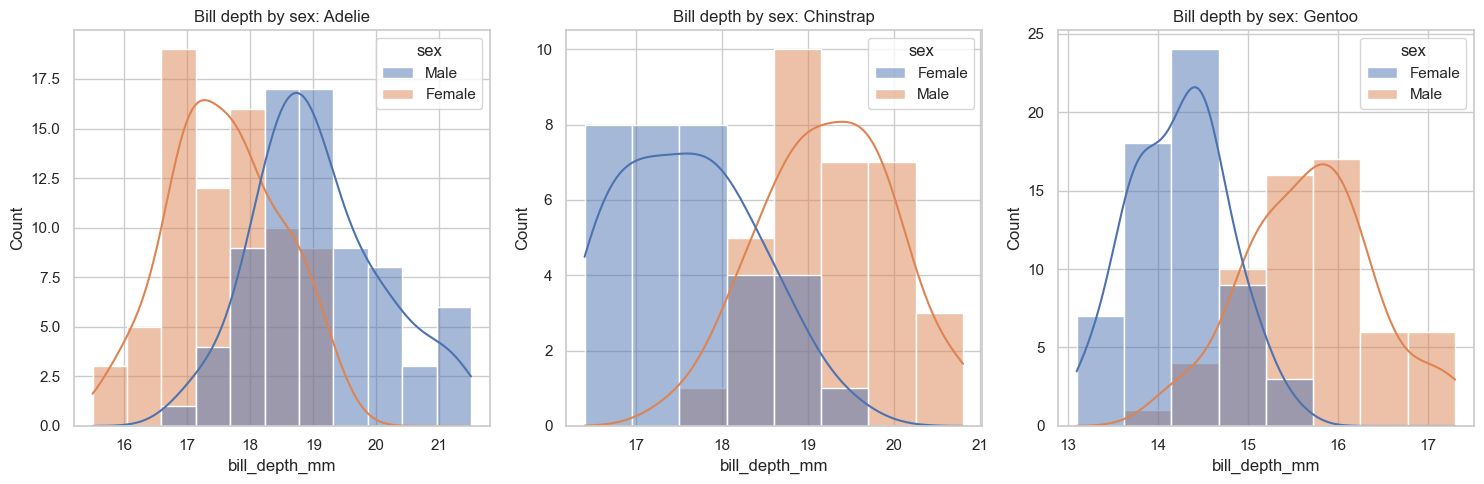

In [77]:
# Plot hostograms by species and by sex for bill_depth_mm
fig, axs = plt.subplots(1, len(categorical_values), figsize=(15, 5))

for i, value in enumerate(categorical_values):
    filtered_df = df_clean[(df_clean['species'] == value) & (df_clean['bill_depth_mm'])] 
    sns.histplot(data=filtered_df, x='bill_depth_mm', kde=True, hue='sex', ax=axs[i])
    axs[i].set_title(f'Bill depth by sex: {value}')

plt.tight_layout()
plt.show()

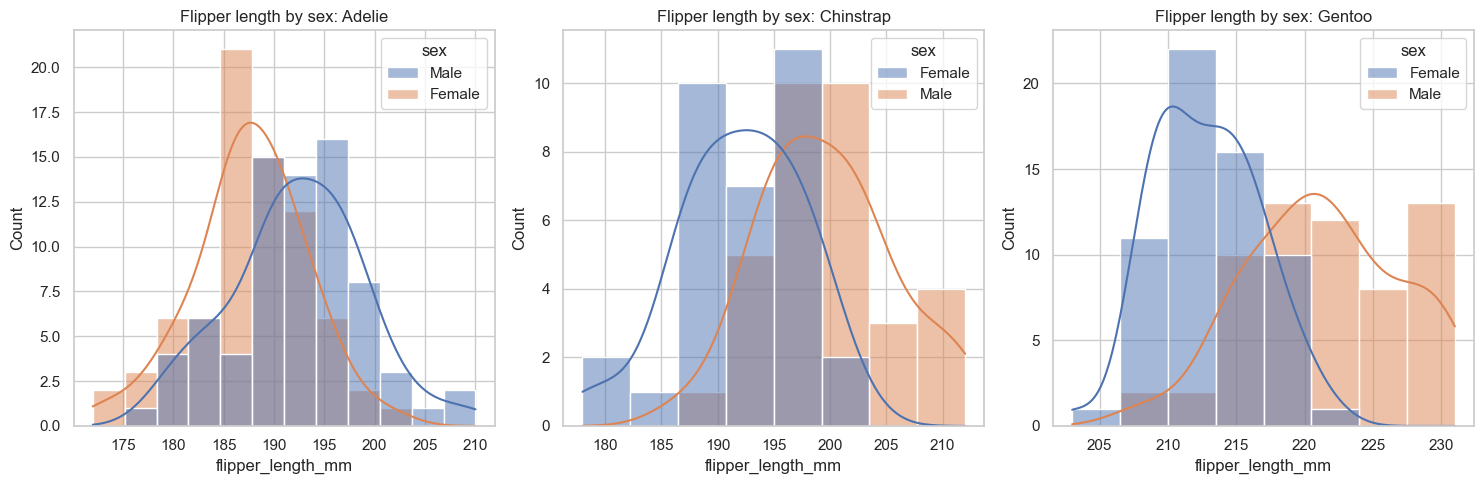

In [78]:
# Plot hostograms by species and by sex for flipper_length_mm
fig, axs = plt.subplots(1, len(categorical_values), figsize=(15, 5))

for i, value in enumerate(categorical_values):
    filtered_df = df_clean[(df_clean['species'] == value) & (df_clean['flipper_length_mm'])] 
    sns.histplot(data=filtered_df, x='flipper_length_mm', kde=True, hue='sex', ax=axs[i])
    axs[i].set_title(f'Flipper length by sex: {value}')

plt.tight_layout()
plt.show()

### See Penguin Analysis report 